# Machine Learning Tokyo: D2L Live Coding Session 1
- Soft Pre-Reqs: little bit of calc, little bit of LA
- Six planned sessions
## Pytorch Primer

In [1]:
import torch
import random

import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')
%load_ext rpy2.ipython

In [2]:
my_tensor = torch.rand(size=(3,4))
my_tensor

tensor([[0.6391, 0.3477, 0.8587, 0.4399],
        [0.3389, 0.5095, 0.4198, 0.5426],
        [0.2002, 0.7261, 0.2515, 0.2334]])

In [3]:
type(my_tensor), my_tensor.dtype

(torch.Tensor, torch.float32)

In [4]:
# Random Normal
torch.randn(3,4)

tensor([[-0.4653,  0.1604, -0.1387, -0.4545],
        [ 2.6769, -0.4370, -1.3380, -0.7523],
        [-2.8752,  0.5187,  2.0834, -0.6777]])

# Autograd Demonstration

In [5]:
a = torch.tensor([4.], requires_grad=True)
b = torch.tensor([12.], requires_grad=True)

In [6]:
a, b

(tensor([4.], requires_grad=True), tensor([12.], requires_grad=True))

In [7]:
print(a.grad), print(b.grad)

None
None


(None, None)

Let's now perform some mathematical operations and watch Torch keep track of the gradients.

In [8]:
y = a**3 - b**2
print(y)

tensor([-80.], grad_fn=<SubBackward0>)


We can compute $\frac{\partial y}{\partial a} = 3 a^2 = 48$ and $\frac{\partial y}{\partial b} = -2b = 24$ as follows:

In [9]:
y.backward()
print(a.grad), print(b.grad)

tensor([48.])
tensor([-24.])
/home/djliden91/.virtualenvs/fastai/lib/python3.9/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


(None, None)

In [10]:
def model(X, w, b):
    """your model"""
    return torch.matmul(X, w) + b

## Define some Synthetic Data

In [11]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)

    return X, y.reshape((-1,1)) # y as 1 col, correct num of rows

In [12]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

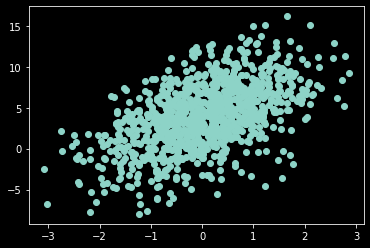

In [13]:
plt.scatter(features[:,0], labels)
plt.show()

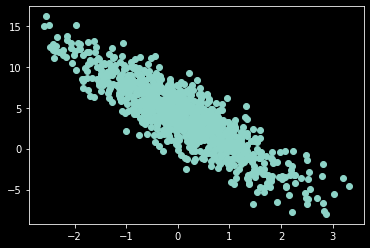

In [14]:
plt.scatter(features[:,1], labels)
plt.show()

In [24]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i +
                                                   batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [16]:
data_generator = data_iter(25, features, labels)

In [17]:
batch_features, batch_labels = next(data_generator)

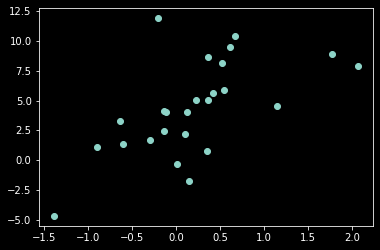

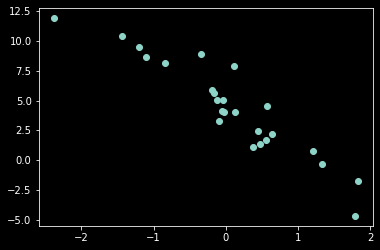

In [18]:
plt.scatter(batch_features[:,0], batch_labels)
plt.show()

plt.scatter(batch_features[:,1], batch_labels)
plt.show()

### Loss Function

$$\mathrm{L}(\mathbf{w}, b) = \frac{1}{n} \sum_i^n l^{(i)}(\mathbf{w}, b)$$

Here $$l^{(i)} = \frac{1}{2} \Big( \hat{y}^{(i)} - y^{(i)}\Big)^2$$

In [19]:
def loss_function(y_hat, y):
    """ your loss function """
    return 0.5*(y_hat-y)**2

### Gradient Descent

- Learning rate: $\eta$
- Batch size: $\vert \mathcal{B} \vert$

$$\mathbf{w}  =  \mathbf{w} - \frac{\eta}{\vert \mathcal{B} \vert} \partial_\mathbf{w} l^{(i)}(\mathbf{w}, b)$$

$$b  =  b - \frac{\eta}{\vert \mathcal{B} \vert} \partial_b l^{(i)}(\mathbf{w}, b)$$

### Write the Training Loop

In [50]:
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)
learning_rate = .01

w = torch.rand(2,1, requires_grad=True)

b = torch.rand(1, requires_grad=True)

print(w)

print(b)

tensor([[0.4963],
        [0.7682]], requires_grad=True)
tensor([0.0885], requires_grad=True)


In [51]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2

for epoch in range(50):
    for X,Y in data_iter(100, features, labels):
        output = model(X, w, b)
        loss = loss_function(output, Y).sum()
        loss.backward()
        with torch.no_grad(): # don't want weight update tracked
            w -= learning_rate * w.grad/len(Y)
            b -= learning_rate * b.grad/len(Y)
            w.grad.zero_() # underscore means inplace
            b.grad.zero_()
    print(loss)    

tensor(1557.0605, grad_fn=<SumBackward0>)
tensor(1202.9932, grad_fn=<SumBackward0>)
tensor(944.8975, grad_fn=<SumBackward0>)
tensor(812.4700, grad_fn=<SumBackward0>)
tensor(815.7634, grad_fn=<SumBackward0>)
tensor(570.2108, grad_fn=<SumBackward0>)
tensor(414.8267, grad_fn=<SumBackward0>)
tensor(414.8328, grad_fn=<SumBackward0>)
tensor(308.2428, grad_fn=<SumBackward0>)
tensor(245.1831, grad_fn=<SumBackward0>)
tensor(259.1579, grad_fn=<SumBackward0>)
tensor(213.1639, grad_fn=<SumBackward0>)
tensor(164.6099, grad_fn=<SumBackward0>)
tensor(129.5017, grad_fn=<SumBackward0>)
tensor(100.0014, grad_fn=<SumBackward0>)
tensor(77.0060, grad_fn=<SumBackward0>)
tensor(67.0228, grad_fn=<SumBackward0>)
tensor(62.2301, grad_fn=<SumBackward0>)
tensor(52.1696, grad_fn=<SumBackward0>)
tensor(40.1510, grad_fn=<SumBackward0>)
tensor(31.6236, grad_fn=<SumBackward0>)
tensor(30.4423, grad_fn=<SumBackward0>)
tensor(24.3160, grad_fn=<SumBackward0>)
tensor(19.3642, grad_fn=<SumBackward0>)
tensor(16.1458, grad_fn

# Making a Neural Network

In [54]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

def update_params(params):
    with torch.no_grad():
        for param in params:
            param -= param.grad*learning_rate/len(Y)
            param.grad.zero_()
    return params

In [57]:
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)

hidden_units_1 = 10

hidden_units_2 = 5

# need to fill in the dimensions
w1 = torch.rand(2, hidden_units_1, requires_grad=True)
b1 = torch.rand(hidden_units_1, requires_grad=True)

w2 = torch.rand(hidden_units_1, hidden_units_2, requires_grad=True)
b2 = torch.rand(hidden_units_2, requires_grad=True)

w3 = torch.rand(hidden_units_2, 1, requires_grad=True)
b3 = torch.rand(1, requires_grad=True)

def model(X):
    """ your model"""
    hidden_layer_1 = relu(torch.matmul(X, w1) + b1)
    hidden_layer_2 = relu(torch.matmul(hidden_layer_1, w2) + b2)
    return torch.matmul(hidden_layer_2, w3) + b3


params = [w1, b1, w2, b2, w3, b3]

In [58]:
for epoch in range(100):
    for X,Y in data_iter(64, features, labels):
        output = model(X)
        loss = loss_function(output, Y).sum()
        loss.backward()
        params = update_params(params)
    print(loss)

tensor(301.0552, grad_fn=<SumBackward0>)
tensor(133.0174, grad_fn=<SumBackward0>)
tensor(93.4613, grad_fn=<SumBackward0>)
tensor(50.7353, grad_fn=<SumBackward0>)
tensor(143.9633, grad_fn=<SumBackward0>)
tensor(22.9281, grad_fn=<SumBackward0>)
tensor(24.1520, grad_fn=<SumBackward0>)
tensor(7.5606, grad_fn=<SumBackward0>)
tensor(33.5623, grad_fn=<SumBackward0>)
tensor(37.0925, grad_fn=<SumBackward0>)
tensor(13.8422, grad_fn=<SumBackward0>)
tensor(2.0682, grad_fn=<SumBackward0>)
tensor(2.9803, grad_fn=<SumBackward0>)
tensor(12.7502, grad_fn=<SumBackward0>)
tensor(2.0330, grad_fn=<SumBackward0>)
tensor(20.7935, grad_fn=<SumBackward0>)
tensor(23.7815, grad_fn=<SumBackward0>)
tensor(3.1888, grad_fn=<SumBackward0>)
tensor(6.5618, grad_fn=<SumBackward0>)
tensor(12.8556, grad_fn=<SumBackward0>)
tensor(7.3811, grad_fn=<SumBackward0>)
tensor(4.5227, grad_fn=<SumBackward0>)
tensor(1.5000, grad_fn=<SumBackward0>)
tensor(5.3625, grad_fn=<SumBackward0>)
tensor(4.9127, grad_fn=<SumBackward0>)
tensor(1

In [101]:
torch.manual_seed(0)
random.seed(0)
np.random.seed(0)


net = torch.nn.Sequential(
    torch.nn.Linear(2, 10),
    torch.nn.ReLU(),
    torch.nn.Linear(10, 5),
    torch.nn.ReLU(),
    torch.nn.Linear(5, 1)
    )

In [102]:
loss_function = torch.nn.MSELoss(reduction='mean')
trainer = torch.optim.SGD(net.parameters(), lr = 0.001)

In [103]:
for epoch in range(50):
    for X,Y in data_iter(75, features, labels):
        trainer.zero_grad()
        outputs = net(X)
        loss = loss_function(outputs, Y)
        loss.backward()
        trainer.step()
    print(loss)

tensor(38.8792, grad_fn=<MseLossBackward>)
tensor(27.7952, grad_fn=<MseLossBackward>)
tensor(37.9050, grad_fn=<MseLossBackward>)
tensor(33.6868, grad_fn=<MseLossBackward>)
tensor(24.5589, grad_fn=<MseLossBackward>)
tensor(32.6742, grad_fn=<MseLossBackward>)
tensor(24.0545, grad_fn=<MseLossBackward>)
tensor(24.4956, grad_fn=<MseLossBackward>)
tensor(21.8446, grad_fn=<MseLossBackward>)
tensor(24.6705, grad_fn=<MseLossBackward>)
tensor(32.4918, grad_fn=<MseLossBackward>)
tensor(25.7841, grad_fn=<MseLossBackward>)
tensor(24.3438, grad_fn=<MseLossBackward>)
tensor(20.7292, grad_fn=<MseLossBackward>)
tensor(19.0158, grad_fn=<MseLossBackward>)
tensor(16.9327, grad_fn=<MseLossBackward>)
tensor(20.4160, grad_fn=<MseLossBackward>)
tensor(22.1326, grad_fn=<MseLossBackward>)
tensor(16.8779, grad_fn=<MseLossBackward>)
tensor(16.0391, grad_fn=<MseLossBackward>)
tensor(20.0305, grad_fn=<MseLossBackward>)
tensor(17.7085, grad_fn=<MseLossBackward>)
tensor(9.0284, grad_fn=<MseLossBackward>)
tensor(13.02